In [2]:
import ee
ee.Initialize()


In [2]:
print(ee.Image('USGS/SRTMGL1_003').getInfo())

{'type': 'Image', 'bands': [{'id': 'elevation', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [1296001, 417601], 'crs': 'EPSG:4326', 'crs_transform': [0.0002777777777777778, 0, -180.0001388888889, 0, -0.0002777777777777778, 60.00013888888889]}], 'id': 'USGS/SRTMGL1_003', 'version': 1641990767055141, 'properties': {'system:visualization_0_min': '0.0', 'type_name': 'Image', 'keywords': ['dem', 'elevation', 'geophysical', 'nasa', 'srtm', 'topography', 'usgs'], 'thumb': 'https://mw1.google.com/ges/dd/images/SRTM90_V4_thumb.png', 'description': '<p>The Shuttle Radar Topography Mission (SRTM, see <a href="https://onlinelibrary.wiley.com/doi/10.1029/2005RG000183/full">Farr\net al. 2007</a>)\ndigital elevation data is an international research effort that\nobtained digital elevation models on a near-global scale. This\nSRTM V3 product (SRTM Plus) is provided by NASA JPL\nat a resolution of 1 arc-second (approximately 30m).</p><p>This dataset

In [7]:
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

In [8]:
import folium

def addLayer(self, ee_object, vis_params, name):
    try:    
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):    
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):    
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):    
            folium.GeoJson(
            data = ee_object.getInfo(),
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):  
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
    
    except:
        print("Could not display {}".format(name))

folium.Map.addLayer = addLayer

In [12]:
Map = folium.Map(location=[20, 0], zoom_start=3, height=500)

basemaps['Google Maps'].add_to(Map)
basemaps['Google Satellite Hybrid'].add_to(Map)

Map.add_child(folium.LayerControl())

display(Map)

In [34]:
vis_params = {
    'min': 0,
    'max': 3000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}

Map = folium.Map(location=[20, 0], zoom_start=2)

Map.add_ee_layer(ee.Image('USGS/SRTMGL1_003'), vis_params, 'SRTM DEM')

Map.add_child(folium.LayerControl())

display(Map)

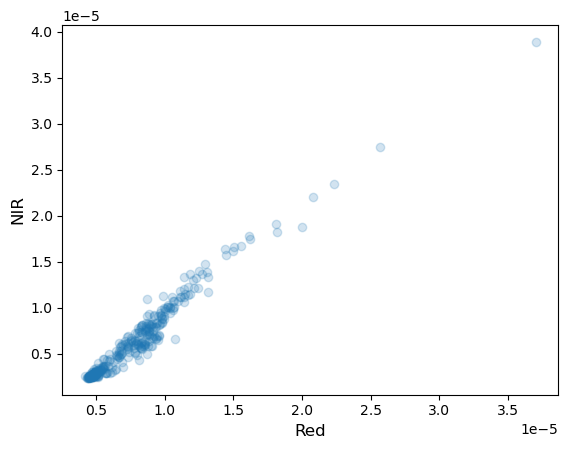

In [38]:
import matplotlib.pyplot as plt

# Get a Landsat 8 image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

samp_fc = image.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()



In [ ]:
Map = folium.Map(location=[40, -100], zoom_start=4)
Map.add_ee_layer(image, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3}, 'Landsat 8')
Map.add_child(folium.LayerControl())

display(Map)

In [6]:
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')
point = ee.Geometry.Point([-122.082, 37.42])
map_center = list(reversed(point.centroid().coordinates().getInfo()))
Map = folium.Map(location=map_center, zoom_start=10)
# Add the Landsat image to the map
vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3}
Map.addLayer(image, vis_params, 'Landsat')
Map.add_child(folium.LayerControl())
# Display the map
Map